## Homework_2021_04_15


### Exercise 1 Pandas基础练习

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = {
    'age': [24, 53, 23, 24, 33, 42, 57, 57, 36, 29, 53, 39],
    'gender': ['M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F'],
    'occupation': ['technician', 'other', 'writer', 'technician', 'technician', 'executive', 'administrator', 'administrator', 'administrator', 'student', 'lawyer', 'other'],
    'zip_code': ['85711', '94043', '32067', '43537', '15213', '98101', '91344', '91344', '05201', '01002', '90703', '30329']
}

创建一组从1开始递增的id，作为行索引，由data生成一个DataFrame：

In [2]:
# TODO
data_df=pd.DataFrame(data,index=range(1,13))
data_df

,age,gender,occupation,zip_code
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002


删除DataFrame中重复的行（保留一行），再删除所有occupation为"other"的行

In [3]:
# TODO
data_df.drop_duplicates(inplace=True)

In [4]:
data_df.drop(data_df[data_df['occupation']=='other'].index,inplace=True)
data_df

,age,gender,occupation,zip_code
1,24,M,technician,85711
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002
11,53,M,lawyer,90703


以两种方式访问DataFrame的第一行：

In [5]:
# TODO
data_df[0:1]

,age,gender,occupation,zip_code
1,24,M,technician,85711


In [6]:
data_df.iloc[0]

age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object

以两种方式访问DataFrame的"occupation"列：

In [7]:
# TODO
data_df["occupation"]

1        technician
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
Name: occupation, dtype: object

In [8]:
data_df.occupation

1        technician
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
Name: occupation, dtype: object

打印出DataFrame中出现次数最多的职业名称：

In [9]:
# TODO
data_df.occupation.value_counts().index[0]

'technician'

将data_2转换成DataFrame，与上一个DataFrame按照"zip_code"这一列合并，按两种合并方式：

1.合并后结果保留两个DataFrame的并集；
2.合并后只保留data_2的所有数据

In [10]:
data_2 = {
    'zip_code': ['85711', '94043', '15213', '98101', '30329'],
    'name': ['Alan', 'Alice', 'Abigail', 'Bob', 'Dave']
}
df2 = pd.DataFrame(data_2)

# TODO


In [11]:
pd.merge(data_df,df2,on="zip_code",how='outer')

,age,gender,occupation,zip_code,name
0,24.0,M,technician,85711,Alan
1,23.0,M,writer,32067,NaN
2,24.0,M,technician,43537,NaN
3,33.0,F,technician,15213,Abigail
4,42.0,M,executive,98101,Bob
5,57.0,M,administrator,91344,NaN
6,36.0,M,administrator,05201,NaN
7,29.0,M,student,01002,NaN
8,53.0,M,lawyer,90703,NaN
9,NaN,NaN,NaN,94043,Alice


In [12]:
pd.merge(data_df,df2,on='zip_code',how='right')

,age,gender,occupation,zip_code,name
0,24.0,M,technician,85711,Alan
1,NaN,NaN,NaN,94043,Alice
2,33.0,F,technician,15213,Abigail
3,42.0,M,executive,98101,Bob
4,NaN,NaN,NaN,30329,Dave


### Exercise 2 Pandas数据分析

使用Pandas的read_csv函数读取 IBM_2006-01-01_to_2018-01-01.csv 中的数据，得到一个DataFrame，并打印该数据的前10行观察一下。

In [13]:
import pandas as pd

IBM_file = 'IBM_2006-01-01_to_2018-01-01.csv'
# TODO
IBM_data=pd.read_csv(IBM_file)

In [14]:
IBM_data.head(10)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
5,2006-01-10,83.15,84.12,83.12,84.07,5701000,IBM
6,2006-01-11,84.37,84.81,83.40,84.17,5776500,IBM
7,2006-01-12,83.82,83.96,83.40,83.57,4926500,IBM
8,2006-01-13,83.00,83.45,82.50,83.17,6921700,IBM
9,2006-01-17,82.80,83.16,82.54,83.00,8761700,IBM


该数据列索引对应的分别是：日期，开盘价，最高价，最低价，收盘价，成交量，股票名称。
通过shape和info()查看数据基本信息：

In [15]:
print(IBM_data.shape)
print(IBM_data.info())

(3020, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB
None


观察到Open与Low这两列相比其他列都缺了一项，请删除DataFrame中所有不完整的数据：

In [16]:
# TODO
IBM_data.dropna(inplace=True)

除此之外还能观察到，由于股市周末和节假日不开盘，日期为2006-01-06的下一条数据就是2006-01-09，缺少了中间两天的数据。为了便于后续处理，请将所有缺少的数据按照以下规则补充：成交量（volume）填充为零，开盘价等价格与前一天（最近的有数据的一天）保持相同。

提示：使用pandas.date_range生成时间序列

In [20]:
IBM_data.Date=pd.to_datetime(IBM_data.Date)
IBM_data_full=pd.merge(pd.DataFrame({"Date":pd.date_range(start='2006-01-03',end='2017-12-29')}),IBM_data,on='Date',how='left')
IBM_data_full.Volume.fillna(0,inplace=True)
IBM_data_full.fillna(method='ffill',inplace=True)

In [21]:
IBM_data_full

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200.0,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600.0,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500.0,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400.0,IBM
4,2006-01-07,83.95,85.03,83.41,84.95,0.0,IBM
...,...,...,...,...,...,...,...
4374,2017-12-25,151.82,153.00,151.50,152.50,0.0,IBM
4375,2017-12-26,152.51,153.86,152.50,152.83,2479017.0,IBM
4376,2017-12-27,152.95,153.18,152.61,153.13,2149257.0,IBM
4377,2017-12-28,153.20,154.12,153.20,154.04,2687624.0,IBM


在DataFrame中按月份聚合，计算一年当中每个月的成交量总和，以及每个月收盘价的次高值。
提示：可以通过apply方法实现自定义的聚合函数。（有多个相同值的话，这里先简单地按照排完序取下标第二个就行了）

In [22]:
IBM_data_full.set_index('Date',inplace=True)

In [23]:
IBM_month_data=pd.DataFrame(columns=('Date',"Max","Second","Volume"))

In [24]:
for i in pd.date_range(start='2006-01',end='2018-01',freq='M'):
    i=str(i)[:7]
    IBM_month_data=IBM_month_data.append({'Date':i,'Max':IBM_data_full[i].Close.nlargest(2)[0],'Second':IBM_data_full[i].Close.nlargest(2)[1],"Volume":IBM_data_full[i].Volume.sum()},ignore_index=True)

In [25]:
IBM_month_data

,Date,Max,Second,Volume
0,2006-01,84.95,84.95,146611300.0
1,2006-02,81.94,81.35,111061200.0
2,2006-03,84.45,83.81,111811000.0
3,2006-04,84.17,83.88,114030800.0
4,2006-05,83.28,83.28,113238100.0
...,...,...,...,...
139,2017-08,145.30,145.16,80295410.0
140,2017-09,146.56,145.99,78281970.0
141,2017-10,162.07,162.07,121897687.0
142,2017-11,154.03,153.97,89776130.0


滑动平均值可以平滑曲线，反应股票价格长期的走势。请在DataFrame中添加一列'Avg_Close'，计算每天股票收盘价的滑动平均值（滑动窗口为过去的30天）。
并在同一张图中绘制出2016年每天股票的收盘价和收盘价滑动平均值的变化曲线。

In [27]:
Avg_list=[np.nan for i in range(30)]
month_sum=IBM_data_full['Close'].iloc[:30].sum()
for i in range(30,4379):
    Avg_list.append(month_sum/30)
    month_sum=month_sum+IBM_data_full.Close.iloc[i]-IBM_data_full.Close.iloc[i-30]
IBM_data_full['Avg_Close']=Avg_list

In [28]:
IBM_data_full

,Open,High,Low,Close,Volume,Name,Avg_Close
Date,,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200.0,IBM,NaN
2006-01-04,82.20,82.50,81.33,81.95,9840600.0,IBM,NaN
2006-01-05,81.40,82.90,81.00,82.50,7213500.0,IBM,NaN
2006-01-06,83.95,85.03,83.41,84.95,8197400.0,IBM,NaN
2006-01-07,83.95,85.03,83.41,84.95,0.0,IBM,NaN
...,...,...,...,...,...,...,...
2017-12-25,151.82,153.00,151.50,152.50,0.0,IBM,153.663667
2017-12-26,152.51,153.86,152.50,152.83,2479017.0,IBM,153.685667
2017-12-27,152.95,153.18,152.61,153.13,2149257.0,IBM,153.718667


在股票数据的DataFrame中新增一列'Increase'，根据收盘价计算每天的股票涨跌幅，这里暂且定义为：
$inc_t = (close_t - close_{t - 1}) / close_{t - 1}$


In [29]:
# TODO
Increase_list=[np.nan]
for i in range(1,4379):
    Increase_list.append(IBM_data_full.Close.iloc[i]/IBM_data_full.Close.iloc[i-1]-1)
IBM_data_full['Increase']=Increase_list
IBM_data_full

,Open,High,Low,Close,Volume,Name,Avg_Close,Increase
Date,,,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200.0,IBM,NaN,NaN
2006-01-04,82.20,82.50,81.33,81.95,9840600.0,IBM,NaN,-0.001340
2006-01-05,81.40,82.90,81.00,82.50,7213500.0,IBM,NaN,0.006711
2006-01-06,83.95,85.03,83.41,84.95,8197400.0,IBM,NaN,0.029697
2006-01-07,83.95,85.03,83.41,84.95,0.0,IBM,NaN,0.000000
...,...,...,...,...,...,...,...,...
2017-12-25,151.82,153.00,151.50,152.50,0.0,IBM,153.663667,0.000000
2017-12-26,152.51,153.86,152.50,152.83,2479017.0,IBM,153.685667,0.002164
2017-12-27,152.95,153.18,152.61,153.13,2149257.0,IBM,153.718667,0.001963


股市及期货市场中常用K线图反映大势的状况和价格信息，k线图的画法包含四个数据，即开盘价、最高价、最低价、收盘价，所有的k线都是围绕这四个数据展开，开盘价高于收盘价和开盘价低于收盘价这两种情况以不同的颜色体现。

![jupyter](./candlestick.jpg)

请以2016年1月初到3月底的数据，根据每日股票价格绘制出K线图。

提示：可以借助mplfinance库，在调用plot时指定type='candle'，或者使用旧方法from mplfinance.original_flavor import candlestick_ohlc


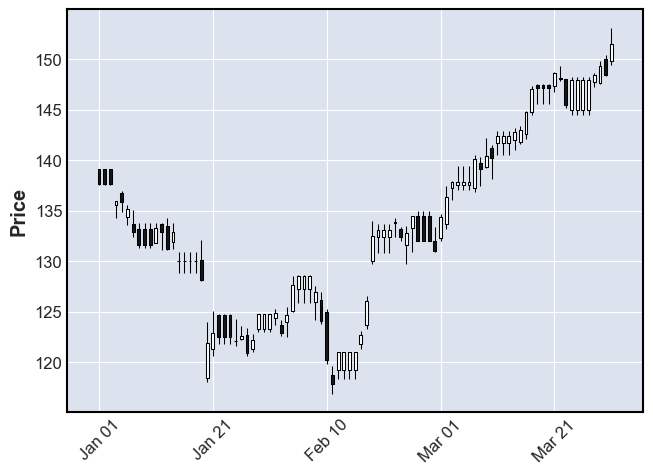

In [30]:
# TODO
import mplfinance as mpf 
mpf.plot(IBM_data_full['2016-01':'2016-03'],type='candle') 

读取AMZN_2006-01-01_to_2018-01-01.csv，其中包含了Amazon的股票数据。
请以Date作为索引，'IBM'和'AMZN'作为列索引，构建一个Dataframe，其中的数据为两家公司每天的股票收盘价。

In [31]:
AMZN_file = 'AMZN_2006-01-01_to_2018-01-01.csv'
IBM_file = 'IBM_2006-01-01_to_2018-01-01.csv'

AMZN_data = pd.read_csv(AMZN_file)
IBM_data = pd.read_csv(IBM_file)

# TODO


In [32]:
pd.DataFrame({'AMZN':AMZN_data.set_index('Date').Close,'IBM':IBM_data.set_index('Date').Close})

,AMZN,IBM
2006-01-03,47.58,82.06
2006-01-04,47.25,81.95
2006-01-05,47.65,82.50
2006-01-06,47.87,84.95
2006-01-09,47.08,83.73
...,...,...
2017-12-22,1168.36,152.50
2017-12-26,1176.76,152.83
2017-12-27,1182.26,153.13
2017-12-28,1186.10,154.04


### Exercise 3 选做部分 

#### 选做题 1
用NumPy实现k-means并加入距离函数的优化，比较不同距离函数得到的结果。

可采用的距离函数：欧氏距离，曼哈顿距离等。
聚类数据可以用上次作业的mnist，或者其他。

#### 选做题 2
用匈牙利算法或KM算法（或网络流）实现最优匹配下的聚类错误率计算。

举个简单的例子，假设现在有25张猫的照片和75张狗的照片，这100张照片经过聚类后被分成两类A和B，A中有20张猫18张狗，B中有5张猫57张狗，那么类别A应该对应猫还是狗才能实现最优匹配（错误率最低）？

延续上一次作业的mnist数据集PCA降维聚类结果（用kmeans聚为10类），实现类别的最优匹配后，计算错误率。（可以辅以图表显示）